In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from IPython.display import clear_output
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import linear_model
#a remove :[8, 10, 12, 13, 22, 96, 117, 126, 136, 137]

In [2]:
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def MAPE(Y_Predicted,Y_actual):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [3]:
variables = pickle.load(open(r'jeu_variables_1.pkl','rb'))
entetes = np.array(variables['X']).reshape(63,141)[:,0]
X = np.array(variables['X']).reshape(63,141)[:,1:141].T.astype('float')
Y = np.array(variables['Y']).reshape(140).astype('float')
remove_bat = [8, 10, 12, 13, 22, 96, 117, 126, 136, 137]
X_clean = np.delete(X, remove_bat, 0)
Y_clean = np.delete(Y, remove_bat)
X = X_clean
Y = Y_clean

In [4]:
def preprossessing(X,Y):# Séparation des données
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
    
    # Normalisation des données
    #sc = StandardScaler(with_mean=True, with_std=True)
    #sc.fit(X_train)
    #X_train = sc.transform(X_train)
    #X_test = sc.transform(X_test)
    return X_train, X_test, Y_train, Y_test

In [5]:
def preprocessing_val(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3,shuffle=True, random_state=42)
    print(X_test.shape)
    print(X_train.shape)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.5, shuffle=True, random_state=42)
    return X_train,X_val, X_test, Y_train, Y_val, Y_test

In [6]:
def normalize(X_train, X_test):
    sc = StandardScaler(with_mean=True, with_std=True)
    sc.fit(X_train)
    X_train_n = sc.transform(X_train)
    X_test_n = sc.transform(X_test)
    return sc, X_train_n, X_test_n

In [7]:
def normalize_val(X_train, X_test, X_val):
    sc = StandardScaler(with_mean=True, with_std=True)
    sc.fit(X_train)
    X_train_n = sc.transform(X_train)
    X_val_n = sc.transform(X_val)
    X_test_n = sc.transform(X_test)
    return sc, X_train_n, X_test_n, X_val_n

In [8]:
X_train,X_val, X_test, Y_train, Y_val, Y_test = preprocessing_val(X, Y)
sc_x,  X_train_n, X_test_n, X_val_n = normalize_val(X_train , X_test, X_val)
sc_y, Y_train_n, Y_test_n, Y_val_n = normalize_val(Y_train.reshape(-1, 1) ,Y_test.reshape(-1,1), Y_val.reshape(-1,1))
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(44, 63)
(86, 63)
(44, 63)
(43, 63)
(43, 63)


In [9]:
import pandas as pd
from sklearn.linear_model import Lasso
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = entetes
    trouve = False
    alphaOpti = 0
    index_var = []
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train_n, Y_train_n)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        print(column_name)
        print(entetes[np.where(df[column_name] > 0.001)])
        print("ok ",np.where(df[column_name] > 0.001)[0].shape[0])
        if(np.where(df[column_name] > 0.001)[0].shape[0] <= 10 and not trouve):
            alphaOpti = alpha
            trouve = True
            index_var = np.where(df[column_name] > 0.001)
            
        
    # Return the datafram    
    return df, alphaOpti, index_var

tableau, alphaOpti, index = lasso(np.logspace(-4,0,20))

Alpha = 0.000100
['I 100-10' 'Qd 100-10' 'Qdlin 100-10' 'T 100-10' 'Tdlin 100-10'
 'I 150-10' 'Qc 150-10' 'Qd 150-10' 'T 150-10' 'dQdV 150-10' 'I 150-100'
 'Qd 150-100' 'V 150-100' 't 150-100' 'I 10' 'Qd 10' 'T 10' 'V 10'
 'dQdV 10' 'I 50' 'Qd 50' 'Qdlin 50' 'T 50' 'Qdlin 100' 'Tdlin 100'
 'dQdV 100' 't 100' 'Qc 150' 'T 150' 'Tdlin 150']
ok  30
Alpha = 0.000162
['I 100-10' 'Qd 100-10' 'Qdlin 100-10' 'T 100-10' 'Tdlin 100-10'
 'I 150-10' 'Qc 150-10' 'Qd 150-10' 'T 150-10' 'dQdV 150-10' 'I 150-100'
 'Qd 150-100' 'V 150-100' 't 150-100' 'Qd 10' 'T 10' 'V 10' 'dQdV 10'
 'I 50' 'Qd 50' 'Qdlin 50' 'T 50' 'Qdlin 100' 'Tdlin 100' 'dQdV 100'
 't 100' 'Qc 150' 'T 150' 'Tdlin 150']
ok  29
Alpha = 0.000264
['I 100-10' 'Qd 100-10' 'Qdlin 100-10' 'T 100-10' 'Tdlin 100-10'
 'I 150-10' 'Qd 150-10' 'T 150-10' 'dQdV 150-10' 'I 150-100' 'Qd 150-100'
 'V 150-100' 't 150-100' 'Qd 10' 'T 10' 'V 10' 'dQdV 10' 'I 50' 'Qdlin 50'
 'T 50' 'Qdlin 100' 'dQdV 100' 't 100' 'Qc 150' 'T 150' 'Tdlin 150']
ok  26
Alpha 

/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.985e-01, tolerance: 4.300e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.416e-01, tolerance: 4.300e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWa

In [10]:
print(index)
X_10 = X[:, index[0]]
print(X_10.shape)

(array([16, 21, 22, 23, 26, 40, 57, 59, 61]),)
(130, 9)


In [11]:
X_train, X_val,X_test, Y_train, Y_val, Y_test = preprocessing_val(X_10, Y)
sc_x,  X_train_n, X_test_n, X_val_n = normalize_val(X_train , X_test, X_val)
sc_y, Y_train_n, Y_test_n, Y_val_n = normalize_val(Y_train.reshape(-1, 1) ,Y_test.reshape(-1,1), Y_val.reshape(-1,1))
#print(np.mean(X_train_n[:, 1]))

(44, 9)
(86, 9)


In [ ]:
#test model gaussian

In [12]:
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel

irregularities_kernel = 5.0**2 * RationalQuadratic(length_scale=5.0, alpha=1.0)
long_term_trend_kernel = 2.0**2 * RBF(length_scale=2.0)
noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)
kernel_gpr = irregularities_kernel + long_term_trend_kernel + noise_kernel

In [13]:
gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel_gpr, n_restarts_optimizer=10)
gpr.fit(X_train_n, Y_train_n)

GaussianProcessRegressor(kernel=5**2 * RationalQuadratic(alpha=1, length_scale=5) + 2**2 * RBF(length_scale=2) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=10)

RMSE test normalisé : 388.85442734761034
(44, 1)
(44,)


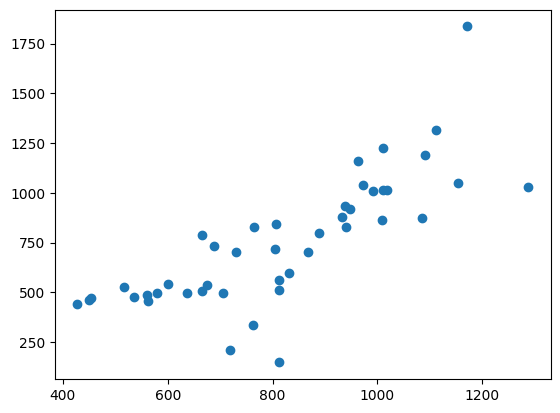

In [14]:
Y_predict_n = gpr.predict(X_test_n)
Y_predict = sc_y.inverse_transform(Y_predict_n)
print(f"RMSE test normalisé : {RMSE(Y_predict, Y_test)}")
print(Y_predict.shape)
print(Y_test.shape)
plt.scatter(Y_predict, Y_test)

In [ ]:
print(Y_test)
print(Y_train)
print(X_train.shape)

In [ ]:
def linear_regression(X,Y):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle linéaire
    reg = linear_model.LinearRegression().fit(X_train, Y_train)

    # Prédictions
    mean_prediction_train = reg.predict(X_train)
    mean_prediction_test = reg.predict(X_test)    
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [ ]:
def linear_logistic_regression(X,Y):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle linéaire regression logistique
    clf = linear_model.LogisticRegression(penalty="none", solver="newton-cg")
    clf.fit(X_train, Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)   
    
    plt.scatter(Y_test, mean_prediction_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [ ]:
def gaussian_process(X,Y):   
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle gaussien
    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    my_gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    my_gaussian_process.fit(X_train, Y_train)
    my_gaussian_process.kernel_
    
    # Prédictions
    mean_prediction_train, std_prediction = my_gaussian_process.predict(X_train, return_std=True)
    mean_prediction, std_prediction = my_gaussian_process.predict(X_test, return_std=True)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction,Y_test))

In [ ]:
def lasso(X,Y,alpha):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle Lasso
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [ ]:
def lassoLars(X,Y,alpha):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle Lasso
    clf = linear_model.LassoLars(alpha=alpha, normalize=False)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [ ]:
def random_forests(X,Y,depth):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle random forests
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [ ]:
def svr(X,Y):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle SVR
    clf = SVR(C=1.0, epsilon=0.2)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [ ]:
linear_regression(X,Y)

In [ ]:
linear_logistic_regression(X,Y)

In [ ]:
gaussian_process(X,Y)

In [ ]:
lasso(X,Y,1.311)

In [ ]:
lassoLars(X,Y,1.33)

In [ ]:
random_forests(X,Y,60)

In [ ]:
svr(X,Y)